# Prepare Environment 

In [1]:
#Loading extention for SQL
%load_ext sql

In [2]:
#To connect your Jupyter Notebookto a SQLite database accideny_data
%sql sqlite:///accident_data_v1.0.0_2023.db

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
import seaborn as sns
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,recall_score,precision_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings('ignore')

connect

In [6]:
conn = sqlite3.connect("/Users/raam/Downloads/Big Data/accident_data_v1.0.0_2023.db")
conn

Cursor

In [7]:
cur = conn.cursor()
cur

Tables in db

In [8]:
%sql SELECT * FROM sqlite_master WHERE type='table';

 * sqlite:///accident_data_v1.0.0_2023.db
Done.


type,name,tbl_name,rootpage,sql
table,accident,accident,2,"CREATE TABLE accident(accident_index PRIMARY KEY, accident_year, accident_reference, location_easting_osgr, location_northing_osgr, longitude, latitude, police_force, accident_severity, number_of_vehicles, number_of_casualties, date, day_of_week, time, local_authority_district, local_authority_ons_district, local_authority_highway, first_road_class, first_road_number, road_type, speed_limit, junction_detail, junction_control, second_road_class, second_road_number, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, light_conditions, weather_conditions, road_surface_conditions, special_conditions_at_site, carriageway_hazards, urban_or_rural_area, did_police_officer_attend_scene_of_accident, trunk_road_flag, lsoa_of_accident_location)"
table,casualty,casualty,20823,"CREATE TABLE casualty(casualty_index PRIMARY KEY, accident_index, accident_year, accident_reference, vehicle_reference, casualty_reference, casualty_class, sex_of_casualty, age_of_casualty, age_band_of_casualty, casualty_severity, pedestrian_location, pedestrian_movement, car_passenger, bus_or_coach_passenger, pedestrian_road_maintenance_worker, casualty_type, casualty_home_area_type, casualty_imd_decile, FOREIGN KEY(accident_index) REFERENCES accident(accident_index))"
table,vehicle,vehicle,31657,"CREATE TABLE vehicle(vehicle_index PRIMARY KEY, accident_index, accident_year, accident_reference, vehicle_reference, vehicle_type, towing_and_articulation, vehicle_manoeuvre, vehicle_direction_from, vehicle_direction_to, vehicle_location_restricted_lane, junction_location, skidding_and_overturning, hit_object_in_carriageway, vehicle_leaving_carriageway, hit_object_off_carriageway, first_point_of_impact, vehicle_left_hand_drive, journey_purpose_of_driver, sex_of_driver, age_of_driver, age_band_of_driver, engine_capacity_cc, propulsion_code, age_of_vehicle, generic_make_model, driver_imd_decile, driver_home_area_type, FOREIGN KEY(accident_index) REFERENCES accident(accident_index))"
table,lsoa,lsoa,50839,"CREATE TABLE lsoa(objectid PRIMARY KEY, lsoa01cd, lsoa01nm, lsoa01nmw, shape__area, shape__length, globalid)"


In [9]:
names=%sql SELECT name FROM sqlite_master WHERE type='table';
print(names)

 * sqlite:///accident_data_v1.0.0_2023.db
Done.
+----------+
|   name   |
+----------+
| accident |
| casualty |
| vehicle  |
|   lsoa   |
+----------+


> . Accident table from db

In [10]:
df_acc = pd.read_sql_query("select * from accident", conn)
df_acc.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,0,4,1,1,0,0,1,1,2,E01001450
1,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,...,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,...,4,4,2,2,0,0,1,1,2,E01001429
4,2017010009350,2017,010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,...,5,4,1,2,0,0,1,1,2,E01001808


In [11]:
#shape of data
print(df_acc.shape)
print(df_acc.columns)
#Data from how many yaers is considered
print(np.unique(df_acc["accident_year"],return_counts=True))

(461352, 36)
Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')
(array([2017, 2018, 2019, 2020]), array([129982, 122635, 1175

In [12]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461352 entries, 0 to 461351
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               461352 non-null  object 
 1   accident_year                                461352 non-null  int64  
 2   accident_reference                           461352 non-null  object 
 3   location_easting_osgr                        461236 non-null  float64
 4   location_northing_osgr                       461236 non-null  float64
 5   longitude                                    461226 non-null  float64
 6   latitude                                     461226 non-null  float64
 7   police_force                                 461352 non-null  int64  
 8   accident_severity                            461352 non-null  int64  
 9   number_of_vehicles                           461352 non-nul

In [13]:
df_acc.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,461352.000000,461236.000000,4.612360e+05,461226.000000,461226.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,...,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000
mean,2018.368378,452593.115756,2.801803e+05,-1.246998,52.408849,28.193388,2.784436,1.840441,1.301245,4.108171,...,0.262112,1.099518,2.036235,1.649918,1.385239,0.217519,0.170518,1.325463,1.334877,1.680147
std,1.091566,94822.718705,1.515501e+05,1.389702,1.365101,24.801609,0.443648,0.709869,0.746398,1.927216,...,1.460680,2.333113,1.724691,1.819426,0.955180,1.240981,1.121964,0.469057,0.556352,0.851554
min,2017.000000,64084.000000,1.023500e+04,-7.525273,49.912362,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2017.000000,388539.000000,1.755300e+05,-2.172668,51.465689,5.000000,3.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2018.000000,459198.500000,2.208650e+05,-1.126264,51.870257,22.000000,3.000000,2.000000,1.000000,4.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2019.000000,529290.000000,3.865510e+05,-0.136389,53.372899,45.000000,3.000000,2.000000,1.000000,6.000000,...,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,2020.000000,655391.000000,1.209512e+06,1.759641,60.763722,99.000000,3.000000,24.000000,59.000000,7.000000,...,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,2.000000


In [14]:
df_acc.isnull().sum()

accident_index                                   0
accident_year                                    0
accident_reference                               0
location_easting_osgr                          116
location_northing_osgr                         116
longitude                                      126
latitude                                       126
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                      

> . Vehicle table from db

In [15]:
df_vehicle = pd.read_sql_query("select * from vehicle", conn)
df_vehicle.head()

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,0,2017010001708,2017,010001708,1,9,0,18,1,5,...,6,1,24,5,1997,2,1,-1,-1,-1
1,1,2017010001708,2017,010001708,2,2,0,18,1,5,...,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2,2017010009342,2017,010009342,1,9,0,18,5,1,...,6,1,33,6,1797,8,8,-1,9,1
3,3,2017010009342,2017,010009342,2,9,0,18,5,1,...,6,1,40,7,2204,2,12,-1,2,1
4,4,2017010009344,2017,010009344,1,9,0,18,3,7,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


In [16]:
#shape of data
print(df_vehicle.shape)
print(df_vehicle.columns)

(849091, 28)
Index(['vehicle_index', 'accident_index', 'accident_year',
       'accident_reference', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type'],
      dtype='object')


In [17]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849091 entries, 0 to 849090
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     849091 non-null  int64 
 1   accident_index                    849091 non-null  object
 2   accident_year                     849091 non-null  int64 
 3   accident_reference                849091 non-null  object
 4   vehicle_reference                 849091 non-null  int64 
 5   vehicle_type                      849091 non-null  int64 
 6   towing_and_articulation           849091 non-null  int64 
 7   vehicle_manoeuvre                 849091 non-null  int64 
 8   vehicle_direction_from            849091 non-null  int64 
 9   vehicle_direction_to              849091 non-null  int64 
 10  vehicle_location_restricted_lane  849091 non-null  int64 
 11  junction_location                 849091 non-null  int64 
 12  sk

In [18]:
df_vehicle.isnull().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

> . Casualty table from db

In [19]:
df_casualty = pd.read_sql_query("select * from Casualty", conn)
df_casualty.head()

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,0,2017010001708,2017,010001708,1,1,2,2,18,4,3,0,0,1,0,0,9,1,2
1,1,2017010001708,2017,010001708,2,2,1,1,19,4,2,0,0,0,0,0,2,-1,-1
2,2,2017010001708,2017,010001708,2,3,2,1,18,4,1,0,0,0,0,0,2,-1,-1
3,3,2017010009342,2017,010009342,1,1,2,2,33,6,3,0,0,1,0,0,9,1,5
4,4,2017010009344,2017,010009344,3,1,1,2,31,6,3,0,0,0,0,0,9,1,5


In [20]:
#shape of data
print(df_casualty.shape)
print(df_casualty.columns)

(600332, 19)
Index(['casualty_index', 'accident_index', 'accident_year',
       'accident_reference', 'vehicle_reference', 'casualty_reference',
       'casualty_class', 'sex_of_casualty', 'age_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')


In [21]:
#casualty_class, sex_of_casualty, age_of_casualty, casuality type

In [22]:
df_casualty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600332 entries, 0 to 600331
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      600332 non-null  int64 
 1   accident_index                      600332 non-null  object
 2   accident_year                       600332 non-null  int64 
 3   accident_reference                  600332 non-null  object
 4   vehicle_reference                   600332 non-null  int64 
 5   casualty_reference                  600332 non-null  int64 
 6   casualty_class                      600332 non-null  int64 
 7   sex_of_casualty                     600332 non-null  int64 
 8   age_of_casualty                     600332 non-null  int64 
 9   age_band_of_casualty                600332 non-null  int64 
 10  casualty_severity                   600332 non-null  int64 
 11  pedestrian_location                 600

In [23]:
df_casualty.isnull().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

> . lsoa from DB

In [24]:
df_lsoa = pd.read_sql_query("select * from lsoa", conn)
df_lsoa.head()

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311


In [25]:
df_lsoa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34378 entries, 0 to 34377
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   objectid       34378 non-null  int64  
 1   lsoa01cd       34378 non-null  object 
 2   lsoa01nm       34378 non-null  object 
 3   lsoa01nmw      34378 non-null  object 
 4   shape__area    34378 non-null  float64
 5   shape__length  34378 non-null  float64
 6   globalid       34378 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ MB


In [26]:
df_lsoa.isnull().sum()

objectid         0
lsoa01cd         0
lsoa01nm         0
lsoa01nmw        0
shape__area      0
shape__length    0
globalid         0
dtype: int64

> Extract 2020 data from DB

In [27]:
# SQL query to get 2020 data
conn = sqlite3.connect("/Users/raam/Downloads/Big Data/accident_data_v1.0.0_2023.db")


query = """
SELECT *
FROM accident a
WHERE a.accident_year = 2020;
"""

acc_2020 = pd.read_sql_query(query, conn)

conn.close()

pd.DataFrame(acc_2020)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [28]:
acc_2020.shape

(91199, 36)

In [29]:
acc_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [30]:
acc_2020.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


Simple Imputer for NaN, Missing values

In [31]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(acc_2020[['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude' ]])
imputed_data = imputer.transform(acc_2020[['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude' ]].values)
acc_2020[['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude' ]] = pd.DataFrame(imputed_data)
acc_2020[['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude' ]]

,location_easting_osgr,location_northing_osgr,longitude,latitude
0,521389.0,175144.0,-0.254001,51.462262
1,529337.0,176237.0,-0.139253,51.470327
2,526432.0,182761.0,-0.178719,51.529614
3,538676.0,184371.0,-0.001683,51.541210
4,529324.0,181286.0,-0.137592,51.515704
...,...,...,...,...
91194,343034.0,731654.0,-2.926320,56.473539
91195,257963.0,658891.0,-4.267565,55.802353
91196,383664.0,810646.0,-2.271903,57.186317
91197,277161.0,674852.0,-3.968753,55.950940


In [32]:
acc_2020.shape

(91199, 36)

In [33]:
acc_2020.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

In [34]:
acc_2020['time'].count()

91199

In [35]:
time = acc_2020['time'].value_counts()

In [36]:
vc=acc_2020["speed_limit"].value_counts()
vc

speed_limit
 30    52260
 60    11408
 20    11183
 40     7867
 70     4687
 50     3782
-1        12
Name: count, dtype: int64

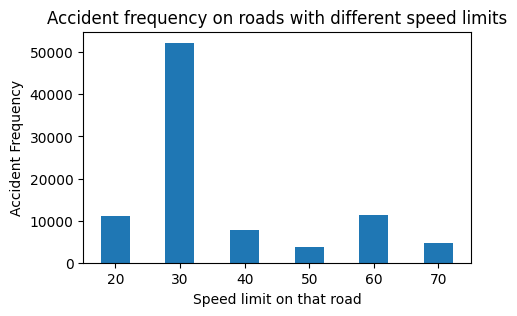

In [37]:
plt.figure(figsize=(5,3))
plt.bar(vc.index[:-1],vc.values[:-1],width=4.5)
plt.xlabel('Speed limit on that road')
plt.ylabel("Accident Frequency")
plt.title("Accident frequency on roads with different speed limits")
plt.show()

In [38]:
vc=acc_2020["accident_severity"].value_counts()
vc

accident_severity
3    71453
2    18355
1     1391
Name: count, dtype: int64

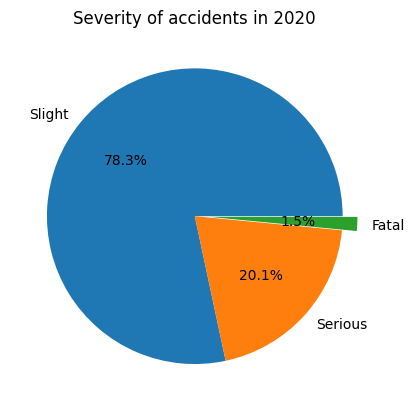

In [39]:
explode = (0,0, 0.1)
plt.pie(vc,labels=["Slight","Serious","Fatal"],autopct='%1.1f%%',explode=explode)
plt.title("Severity of accidents in 2020")
plt.show()

In [40]:
vc=acc_2020["urban_or_rural_area"].value_counts()
vc

urban_or_rural_area
1    61737
2    29448
3       14
Name: count, dtype: int64

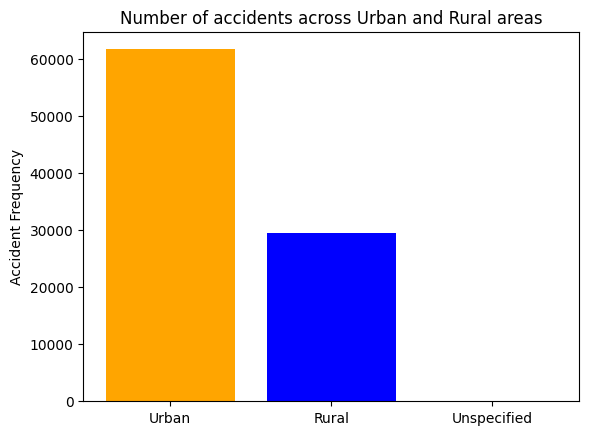

In [41]:
plt.bar(["Urban","Rural","Unspecified"],vc.values,color=["orange","blue","green"])
plt.xticks()
plt.ylabel("Accident Frequency")
plt.title("Number of accidents across Urban and Rural areas")
plt.show()

In [42]:
police_force_dict = {
    '1': 'Metropolitan Police',
    '3': 'Cumbria',
    '4': 'Lancashire',
    '5': 'Merseyside',
    '6': 'Greater Manchester',
    '7': 'Cheshire',
    '10': 'Northumbria',
    '11': 'Durham',
    '12': 'North Yorkshire',
    '13': 'West Yorkshire',
    '14': 'South Yorkshire',
    '16': 'Humberside',
    '17': 'Cleveland',
    '20': 'West Midlands',
    '21': 'Staffordshire',
    '22': 'West Mercia',
    '23': 'Warwickshire',
    '30': 'Derbyshire',
    '31': 'Nottinghamshire',
    '32': 'Lincolnshire',
    '33': 'Leicestershire',
    '34': 'Northamptonshire',
    '35': 'Cambridgeshire',
    '36': 'Norfolk',
    '37': 'Suffolk',
    '40': 'Bedfordshire',
    '41': 'Hertfordshire',
    '42': 'Essex',
    '43': 'Thames Valley',
    '44': 'Hampshire',
    '45': 'Surrey',
    '46': 'Kent',
    '47': 'Sussex',
    '48': 'City of London',
    '50': 'Devon and Cornwall',
    '52': 'Avon and Somerset',
    '53': 'Gloucestershire',
    '54': 'Wiltshire',
    '55': 'Dorset',
    '60': 'North Wales',
    '61': 'Gwent',
    '62': 'South Wales',
    '63': 'Dyfed-Powys',
    '91': 'Northern',
    '92': 'Grampian',
    '93': 'Tayside',
    '94': 'Fife',
    '95': 'Lothian and Borders',
    '96': 'Central',
    '97': 'Strathclyde',
    '99': 'Dumfries and Galloway'
}

In [43]:
d={}
for i in range(len(acc_2020)):
    if acc_2020.loc[i,"police_force"] in d:
        if(acc_2020.loc[i,"did_police_officer_attend_scene_of_accident"]==1):
            d[acc_2020.loc[i,"police_force"]]+=1
    else:
        d[acc_2020.loc[i,"police_force"]]=1

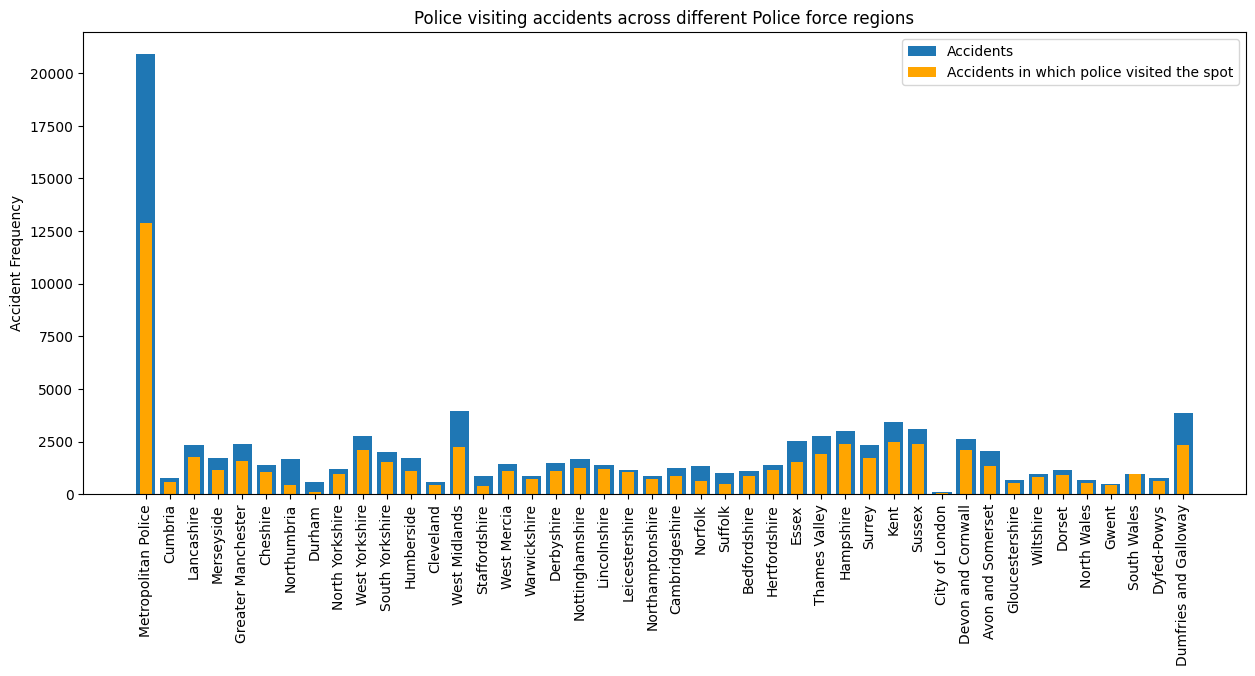

In [44]:
plt.figure(figsize=(15, 6))
acc_in_police_force=acc_2020["police_force"].value_counts().sort_index()
names=list(acc_in_police_force.index)
counts=list(acc_in_police_force.values)
for i in range(len(names)):
    names[i]=police_force_dict[str(names[i])]
plt.bar(names,counts)
plt.bar(names,d.values(),color="orange",width=0.5)
plt.legend(["Accidents","Accidents in which police visited the spot"])
plt.xticks(rotation=90)
plt.ylabel("Accident Frequency")
plt.title("Police visiting accidents across different Police force regions")
plt.show()

In [45]:
#Value counts of accidents
d1=dict(zip(names,counts))
print(d1)

{'Metropolitan Police': 20906, 'Cumbria': 755, 'Lancashire': 2354, 'Merseyside': 1717, 'Greater Manchester': 2399, 'Cheshire': 1363, 'Northumbria': 1690, 'Durham': 601, 'North Yorkshire': 1180, 'West Yorkshire': 2764, 'South Yorkshire': 2021, 'Humberside': 1709, 'Cleveland': 570, 'West Midlands': 3933, 'Staffordshire': 879, 'West Mercia': 1446, 'Warwickshire': 855, 'Derbyshire': 1462, 'Nottinghamshire': 1677, 'Lincolnshire': 1396, 'Leicestershire': 1133, 'Northamptonshire': 886, 'Cambridgeshire': 1246, 'Norfolk': 1324, 'Suffolk': 995, 'Bedfordshire': 1084, 'Hertfordshire': 1398, 'Essex': 2536, 'Thames Valley': 2767, 'Hampshire': 3016, 'Surrey': 2334, 'Kent': 3405, 'Sussex': 3107, 'City of London': 107, 'Devon and Cornwall': 2616, 'Avon and Somerset': 2044, 'Gloucestershire': 695, 'Wiltshire': 961, 'Dorset': 1158, 'North Wales': 658, 'Gwent': 487, 'South Wales': 958, 'Dyfed-Powys': 771, 'Dumfries and Galloway': 3836}


In [46]:
#Accidents in which police visited
d2=dict(zip(names,d.values()))
print(d2)

{'Metropolitan Police': 12885, 'Cumbria': 585, 'Lancashire': 1787, 'Merseyside': 1171, 'Greater Manchester': 1574, 'Cheshire': 1029, 'Northumbria': 451, 'Durham': 112, 'North Yorkshire': 951, 'West Yorkshire': 2120, 'South Yorkshire': 1525, 'Humberside': 1100, 'Cleveland': 416, 'West Midlands': 2246, 'Staffordshire': 377, 'West Mercia': 1103, 'Warwickshire': 699, 'Derbyshire': 1102, 'Nottinghamshire': 1224, 'Lincolnshire': 1178, 'Leicestershire': 1074, 'Northamptonshire': 719, 'Cambridgeshire': 865, 'Norfolk': 632, 'Suffolk': 484, 'Bedfordshire': 858, 'Hertfordshire': 1125, 'Essex': 1532, 'Thames Valley': 1923, 'Hampshire': 2371, 'Surrey': 1737, 'Kent': 2465, 'Sussex': 2393, 'City of London': 76, 'Devon and Cornwall': 2108, 'Avon and Somerset': 1336, 'Gloucestershire': 538, 'Wiltshire': 809, 'Dorset': 896, 'North Wales': 544, 'Gwent': 441, 'South Wales': 943, 'Dyfed-Powys': 622, 'Dumfries and Galloway': 2325}


In [47]:
# SQL query to get 2020 data
conn = sqlite3.connect("/Users/raam/Downloads/Big Data/accident_data_v1.0.0_2023.db")

query = """
SELECT *
FROM vehicle v
join accident a on a.accident_index=v.accident_index
WHERE v.accident_year = 2020;
"""

veh_2020 = pd.read_sql_query(query, conn)

conn.close()

pd.DataFrame(veh_2020)

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,9,1,9,9,0,0,1,3,2,E01004576
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,4,1,1,1,0,0,1,1,2,E01003034
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,0,4,1,2,0,0,1,1,2,E01004726
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,4,4,1,1,0,0,1,1,2,E01003617
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,0,1,1,1,0,0,2,1,-1,-1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,0,1,1,1,0,0,2,1,-1,-1
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,0,1,1,1,0,0,1,2,-1,-1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,0,1,1,1,0,0,1,2,-1,-1


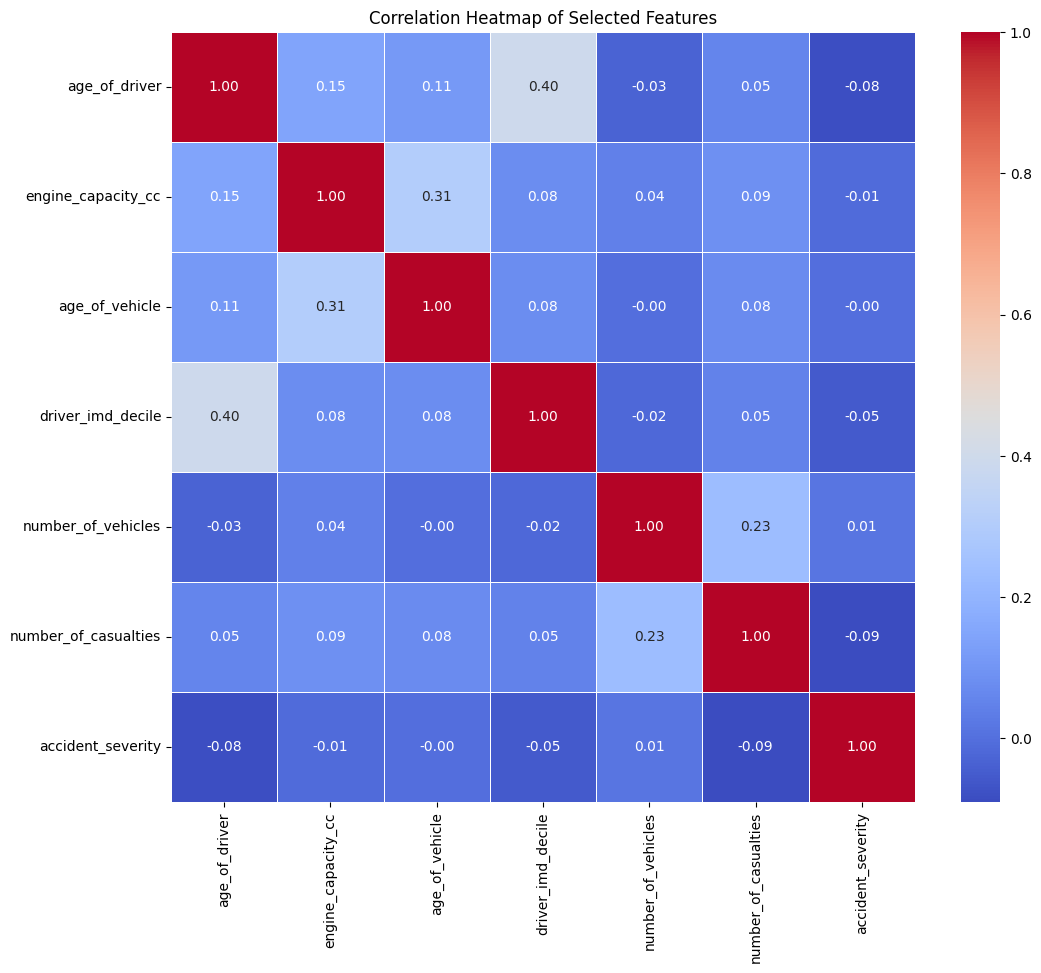

In [48]:
selected_features = [
    'age_of_driver',
    'engine_capacity_cc',
    'age_of_vehicle',
    'driver_imd_decile',
    'number_of_vehicles',
    'number_of_casualties',
    'accident_severity'
]

# Extract the selected features
selected_df = veh_2020[selected_features]
# selected_df=pd.get_dummies(selected_df,columns=['accident_severity'])
# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [49]:
vc=veh_2020["vehicle_type"].value_counts()

In [50]:
vc

vehicle_type
9     114145
1      16766
19     10338
3       7523
5       3784
8       2612
21      2501
11      2213
4       1691
90      1185
2       1128
98      1072
20       898
97       478
17       435
10       225
22       189
23        93
16        90
18         9
Name: count, dtype: int64

In [51]:
vehicle_dict = {
    '1': 'Pedal cycle',
    '2': 'Motorcycle 50cc and under',
    '3': 'Motorcycle over 50cc and up to 125cc',
    '4': 'Motorcycle over 125cc and up to 500cc',
    '5': 'Motorcycle over 500cc',
    '97': 'Motorcycle – unknown cc',
    '23': 'Electric motorcycle',
    '8': 'Taxi/Private hire car',
    '9': 'Car',
    '10': 'Minibus (8 - 16 passenger seats)',
    '11': 'Bus or coach (17 or more passenger seats)',
    '16': 'Ridden horse',
    '17': 'Agricultural vehicle (includes diggers etc.)',
    '18': 'Tram/Light rail',
    '19': 'Van/Goods vehicle 3.5 tonnes maximum gross weight (mgw) and under',
    '20': 'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw',
    '21': 'Goods vehicle 7.5 tonnes mgw and over',
    '98': 'Goods vehicle – unknown weight',
    '22': 'Mobility scooter',
    '90': 'Other vehicle'
}

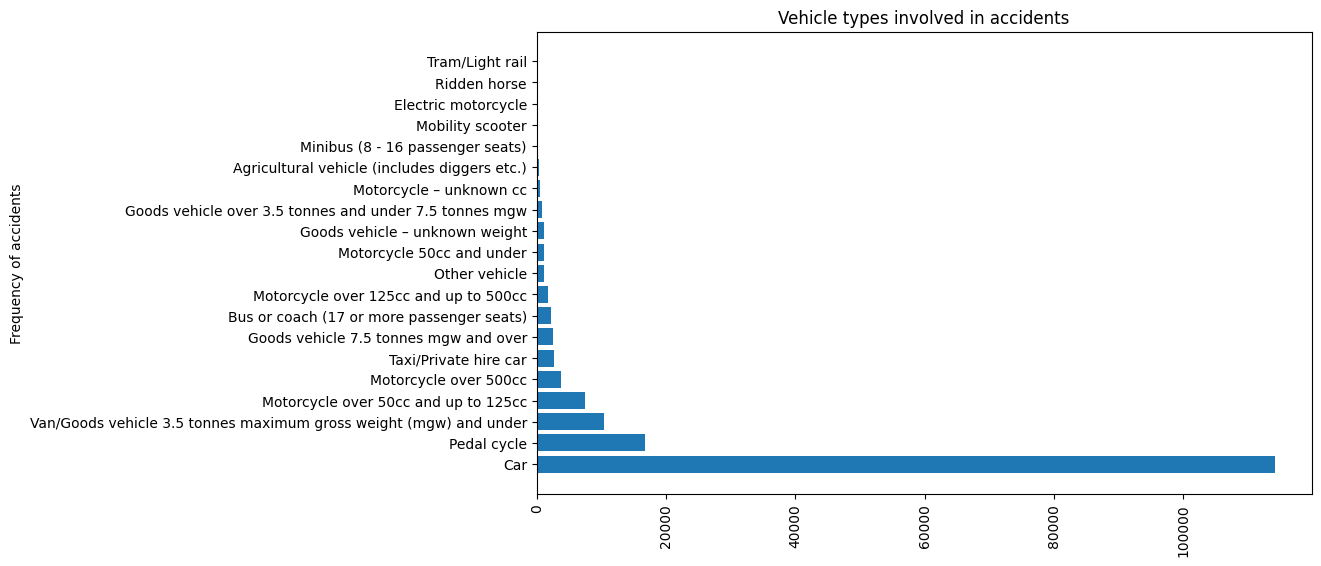

In [52]:
plt.figure(figsize=(10, 6))
names=list(vc.index)
counts=list(vc.values)
for i in range(len(names)):
    names[i]=vehicle_dict[str(names[i])]
plt.barh(names,counts)
# plt.bar(names,d.values(),color="orange",width=0.5)
plt.xticks(rotation=90)
plt.title("Vehicle types involved in accidents")
plt.ylabel("Frequency of accidents")
plt.show()

In [53]:

d=dict(zip(names,counts))
print(d)

{'Car': 114145, 'Pedal cycle': 16766, 'Van/Goods vehicle 3.5 tonnes maximum gross weight (mgw) and under': 10338, 'Motorcycle over 50cc and up to 125cc': 7523, 'Motorcycle over 500cc': 3784, 'Taxi/Private hire car': 2612, 'Goods vehicle 7.5 tonnes mgw and over': 2501, 'Bus or coach (17 or more passenger seats)': 2213, 'Motorcycle over 125cc and up to 500cc': 1691, 'Other vehicle': 1185, 'Motorcycle 50cc and under': 1128, 'Goods vehicle – unknown weight': 1072, 'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw': 898, 'Motorcycle – unknown cc': 478, 'Agricultural vehicle (includes diggers etc.)': 435, 'Minibus (8 - 16 passenger seats)': 225, 'Mobility scooter': 189, 'Electric motorcycle': 93, 'Ridden horse': 90, 'Tram/Light rail': 9}


# Q1. Significant hours of the day, and days of the week, on which accidents occur

In [54]:
acc_2020['hour'] = pd.to_datetime(acc_2020['time'], format='%H:%M').dt.hour

In [55]:
acc_by_hour = acc_2020['hour'].value_counts()
acc_by_hour = acc_by_hour.sort_index()
acc_by_hour

hour
0     1188
1      915
2      658
3      566
4      508
5      855
6     1830
7     3736
8     5267
9     3917
10    4173
11    4812
12    5395
13    5741
14    6245
15    7361
16    7381
17    7813
18    6618
19    5048
20    3715
21    3106
22    2555
23    1796
Name: count, dtype: int64

In [56]:
day_of_week_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
accidents_by_day_of_week = acc_2020['day_of_week'].value_counts().sort_index()

In [57]:
accidents_by_day_of_week

day_of_week
1    10315
2    12772
3    13267
4    13564
5    14056
6    14889
7    12336
Name: count, dtype: int64

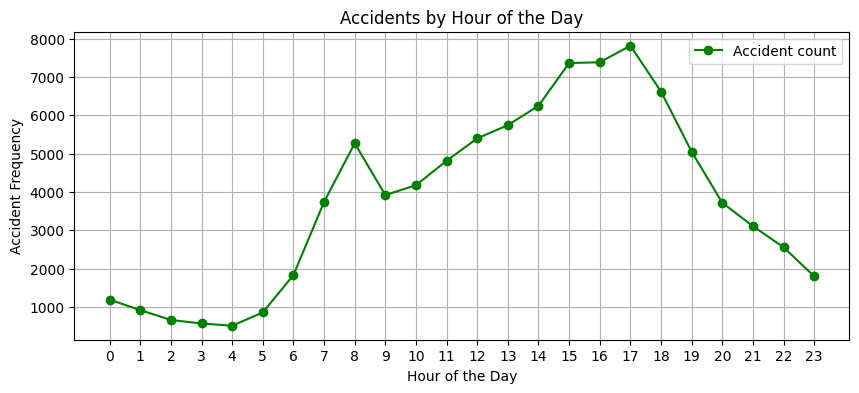

In [58]:
plt.figure(figsize=(10, 4))
plt.plot(acc_by_hour.index, acc_by_hour.values, marker='o', color='green',label="Accident count")
plt.xlabel('Hour of the Day')
plt.ylabel('Accident Frequency')
plt.title('Accidents by Hour of the Day')
plt.grid(True)
plt.xticks(range(24))
plt.legend(loc=0)
plt.show()

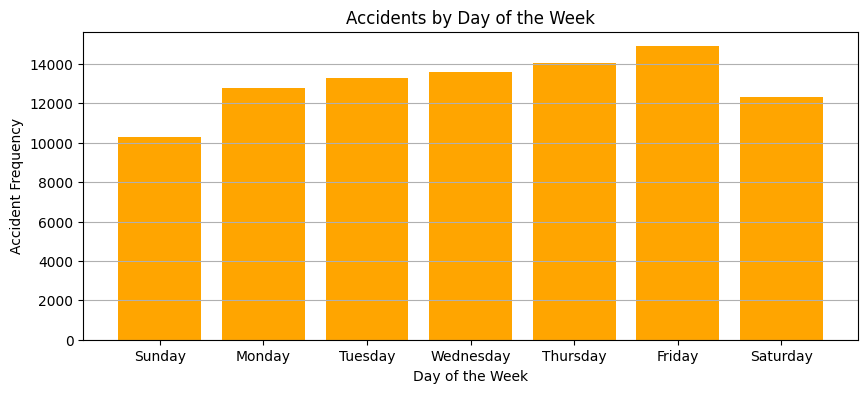

In [59]:
plt.figure(figsize=(10, 4))
plt.bar(day_of_week_labels, accidents_by_day_of_week.values, color='orange')
plt.xlabel('Day of the Week')
plt.ylabel('Accident Frequency')
plt.title('Accidents by Day of the Week')
plt.grid(axis='y')
plt.show()

> vehicle table

In [60]:
df_vehicle.head()

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,0,2017010001708,2017,010001708,1,9,0,18,1,5,...,6,1,24,5,1997,2,1,-1,-1,-1
1,1,2017010001708,2017,010001708,2,2,0,18,1,5,...,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2,2017010009342,2017,010009342,1,9,0,18,5,1,...,6,1,33,6,1797,8,8,-1,9,1
3,3,2017010009342,2017,010009342,2,9,0,18,5,1,...,6,1,40,7,2204,2,12,-1,2,1
4,4,2017010009344,2017,010009344,1,9,0,18,3,7,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


# Q2. Significant hours of the day, and days of the week, on which accidents occur based on vehical CC

In [61]:
print(veh_2020.columns)
# veh_2020['engine_capacity_cc'].value_counts()

Index(['vehicle_index', 'accident_index', 'accident_year',
       'accident_reference', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type', 'location_easting_osgr',
       'location_northing_osgr', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_week', 'time', 'local_authority_district',
       'local_authority_ons_d

In [62]:
veh_2020['hour'] = pd.to_datetime(veh_2020['time'], format='%H:%M').dt.hour

In [63]:
c_125=veh_2020['vehicle_type'] == 3
c_50=veh_2020['vehicle_type'] == 2
motorcycle_under_125cc=veh_2020[c_50|c_125]
motorcycle_125cc_500cc = veh_2020[veh_2020['vehicle_type'] == 4]
motorcycle_over_500cc = veh_2020[veh_2020['vehicle_type'] == 5]

In [64]:
under = motorcycle_under_125cc['hour'].value_counts().sort_index()
between=motorcycle_125cc_500cc['hour'].value_counts().sort_index()
over=motorcycle_over_500cc['hour'].value_counts().sort_index()

In [65]:
under

hour
0      73
1      60
2      37
3      30
4      30
5      59
6     133
7     293
8     304
9     245
10    289
11    364
12    485
13    591
14    605
15    647
16    706
17    805
18    806
19    669
20    534
21    424
22    291
23    171
Name: count, dtype: int64

In [66]:
between

hour
0      17
1      18
2       4
3       5
4       9
5      13
6      35
7      77
8      62
9      54
10     67
11     70
12     93
13    122
14    131
15    151
16    157
17    175
18    128
19     93
20     82
21     56
22     38
23     34
Name: count, dtype: int64

In [67]:
over

hour
0      11
1      17
2       8
3       7
4       4
5      44
6      91
7     180
8     133
9     123
10    175
11    258
12    275
13    323
14    323
15    336
16    366
17    421
18    242
19    163
20    112
21     83
22     56
23     33
Name: count, dtype: int64

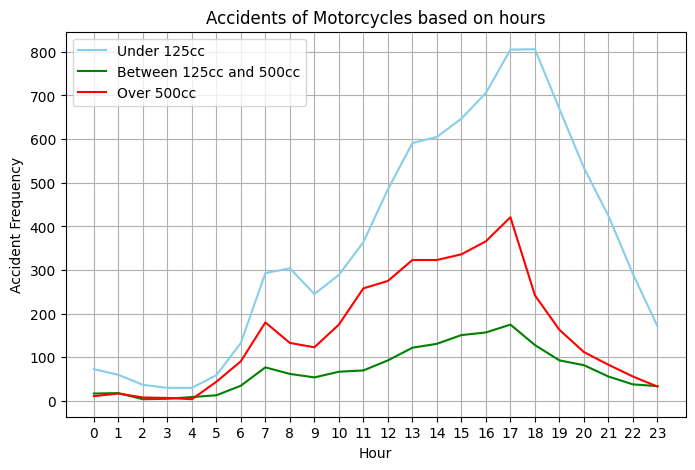

In [68]:
fig=plt.figure(figsize=(8,5))
spc=np.arange(24)
plt.plot(under,
        label='Under 125cc',color='skyblue')
plt.plot(between,
        label='Between 125cc and 500cc',color='green')
plt.plot(over,
        label='Over 500cc',color='red')
plt.xlabel('Hour')
plt.xticks(range(24))
plt.ylabel('Accident Frequency')
plt.title('Accidents of Motorcycles based on hours')
plt.legend(loc=0)
plt.grid()
plt.show()

In [69]:
day_of_week_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
under_week = motorcycle_under_125cc['day_of_week'].value_counts().sort_index()
between_week = motorcycle_125cc_500cc['day_of_week'].value_counts().sort_index()
over_week = motorcycle_over_500cc['day_of_week'].value_counts().sort_index()

In [70]:
under_week

day_of_week
1     948
2    1173
3    1202
4    1249
5    1389
6    1474
7    1216
Name: count, dtype: int64

In [71]:
between_week

day_of_week
1    218
2    227
3    234
4    251
5    257
6    267
7    237
Name: count, dtype: int64

In [72]:
over_week

day_of_week
1    675
2    468
3    497
4    501
5    526
6    567
7    550
Name: count, dtype: int64

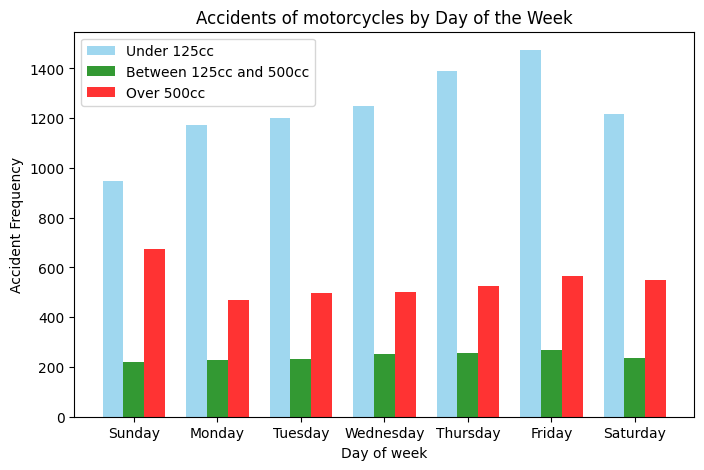

In [73]:
fig=plt.figure(figsize=(8,5))
spc=np.arange(7)
plt.bar(spc,under_week,
        label='Under 125cc',color='skyblue',width=0.25,alpha=0.8)
plt.bar(spc+0.25,between_week,
        label='Between 125cc and 500cc',color='green',width=0.25,alpha=0.8)
plt.bar(spc+0.5,over_week,
        label='Over 500cc',color='red',width=0.25,alpha=0.8)
plt.legend(loc=0)
plt.xlabel("Day of week")
plt.xticks(spc+0.25,day_of_week_labels)
plt.ylabel('Accident Frequency')
plt.title('Accidents of motorcycles by Day of the Week')
plt.show()

# Q3. Significant hours of the day, and days of the week, on which pedestrians are involved in accidents

In [74]:
# SQL query to get 2020 data
conn = sqlite3.connect("/Users/raam/Downloads/Big Data/accident_data_v1.0.0_2023.db")

query = """
SELECT *
FROM accident a
inner join casualty c on a.accident_index=c.accident_index
WHERE a.accident_year = 2020;
"""

acc_cas_2020 = pd.read_sql_query(query, conn)

conn.close()

pd.DataFrame(acc_cas_2020)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,6,3,9,5,0,0,0,0,1,4
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1,3,1,1,0,0,0,0,1,2
2,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1,3,1,1,0,0,0,0,1,2
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,5,3,5,9,0,0,0,0,1,3
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,3,2,0,0,0,0,0,1,1,2
115580,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,9,3,10,1,0,0,0,0,1,10
115581,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,7,2,0,0,0,0,0,5,2,9
115582,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,11,3,0,0,0,0,0,1,1,9


In [75]:
acc_cas_2020['hour'] = pd.to_datetime(acc_cas_2020['time'], format='%H:%M').dt.hour

In [76]:
ped_acc=acc_cas_2020[acc_cas_2020["casualty_class"]==3]
ped_hour=ped_acc['hour'].value_counts().sort_index()
ped_hour

hour
0      173
1      144
2       83
3       82
4       50
5       74
6      173
7      514
8     1060
9      607
10     644
11     725
12     809
13     833
14    1015
15    1672
16    1323
17    1274
18    1146
19     824
20     518
21     412
22     365
23     230
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


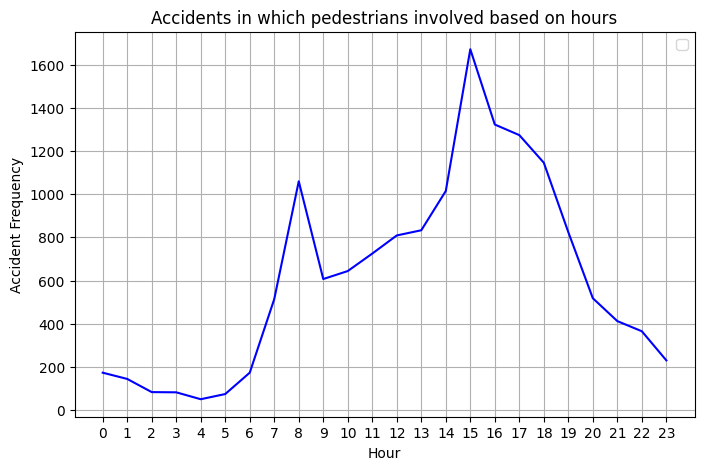

In [77]:
fig=plt.figure(figsize=(8,5))
plt.plot(ped_hour,color='blue')
plt.xlabel('Hour')
plt.xticks(range(24))
plt.ylabel('Accident Frequency')
plt.title('Accidents in which pedestrians involved based on hours')
plt.legend(loc=0)
plt.grid()
plt.show()

In [78]:
day_of_week_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ped_week = ped_acc['day_of_week'].value_counts().sort_index()
ped_week

day_of_week
1    1242
2    2207
3    2267
4    2247
5    2366
6    2543
7    1878
Name: count, dtype: int64

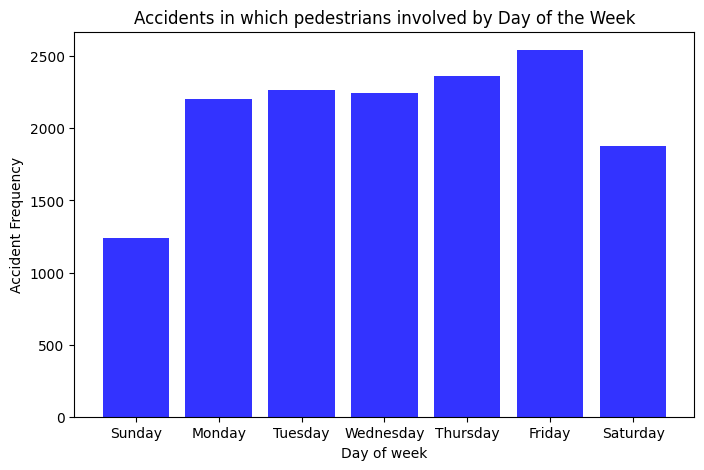

In [79]:
fig=plt.figure(figsize=(8,5))
plt.bar(day_of_week_labels,ped_week.values,color='blue',alpha=0.8)
plt.xlabel("Day of week")
plt.xticks(day_of_week_labels)
plt.ylabel('Accident Frequency')
plt.title('Accidents in which pedestrians involved by Day of the Week')
plt.show()

# Q4. Apriori

In [80]:
acc_2020[['day_of_week', 'time', 'weather_conditions', 'road_type', 'junction_detail', 'road_surface_conditions', 'speed_limit', 'accident_severity']]

,day_of_week,time,weather_conditions,road_type,junction_detail,road_surface_conditions,speed_limit,accident_severity
0,3,09:00,9,6,0,9,20,3
1,2,13:55,1,6,9,1,20,3
2,4,01:25,1,6,3,2,30,3
3,4,01:50,1,6,0,1,30,2
4,4,02:25,1,6,3,1,30,3
...,...,...,...,...,...,...,...,...
91194,4,14:30,1,6,1,1,30,2
91195,6,15:05,1,9,3,1,30,3
91196,4,12:42,1,6,8,1,60,2
91197,3,14:00,1,6,3,1,30,3


In [81]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [82]:
acc_2020['hour'] = pd.to_datetime(acc_2020['time'], format='%H:%M').dt.hour

In [83]:
df_selected = acc_2020[['day_of_week', 'hour', 'weather_conditions', 'road_type', 'junction_detail', 'road_surface_conditions', 'speed_limit', 'accident_severity']]

In [84]:
# Convert categorical variables to one-hot encoding as to aply appriori we need the specific feature instance of each feature as true/false 
df_encoded = pd.get_dummies(df_selected, drop_first=True)

# Convert the DataFrame to a list of lists for transaction encoding
transactions = df_encoded.values.tolist()

In [85]:
#getting binary values mentions that if that specific feature present in the transaction
df_binary = pd.get_dummies(df_selected, columns=['day_of_week', 'hour', 'weather_conditions', 'road_type', 'junction_detail', 'road_surface_conditions', 'speed_limit', 'accident_severity'])

In [86]:
# Applying Apriori algorithm
#getting freq itemsets with min_support of 0.3
frequent_itemsets = apriori(df_binary, min_support=0.3, use_colnames=True)
#finding association rules with the extracted frequent sets
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)

In [87]:
frequent_itemsets

,support,itemsets
0,0.775546,(weather_conditions_1)
1,0.733879,(road_type_6)
2,0.416430,(junction_detail_0)
3,0.687486,(road_surface_conditions_1)
4,0.573033,(speed_limit_30)
5,0.783484,(accident_severity_3)
6,0.577353,"(weather_conditions_1, road_type_6)"
7,0.320793,"(weather_conditions_1, junction_detail_0)"
8,0.645248,"(weather_conditions_1, road_surface_conditions_1)"
9,0.450137,"(weather_conditions_1, speed_limit_30)"


In [88]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(weather_conditions_1),(road_type_6),0.775546,0.733879,0.577353,0.744447,1.014401,0.008196,1.041355,0.063248
1,(road_type_6),(weather_conditions_1),0.733879,0.775546,0.577353,0.786714,1.014401,0.008196,1.052364,0.053346
2,(weather_conditions_1),(junction_detail_0),0.775546,0.416430,0.320793,0.413635,0.993289,-0.002168,0.995234,-0.029224
3,(junction_detail_0),(weather_conditions_1),0.416430,0.775546,0.320793,0.770341,0.993289,-0.002168,0.977336,-0.011446
4,(weather_conditions_1),(road_surface_conditions_1),0.775546,0.687486,0.645248,0.831993,1.210196,0.112072,1.860122,0.773823


In [89]:
d={}
for i in range(len(rules)):
    l=rules.loc[i,"consequents"]
    if ("accident_severity_3" in l or "accident_severity_2" in l or "accident_severity_1" in l):
        print(list(rules.loc[i,"antecedents"]), "---->",list(rules.loc[i,"consequents"]))

['weather_conditions_1'] ----> ['accident_severity_3']
['road_type_6'] ----> ['accident_severity_3']
['junction_detail_0'] ----> ['accident_severity_3']
['road_surface_conditions_1'] ----> ['accident_severity_3']
['speed_limit_30'] ----> ['accident_severity_3']
['weather_conditions_1', 'road_type_6'] ----> ['accident_severity_3']
['weather_conditions_1'] ----> ['road_type_6', 'accident_severity_3']
['road_type_6'] ----> ['weather_conditions_1', 'accident_severity_3']
['weather_conditions_1', 'road_surface_conditions_1'] ----> ['accident_severity_3']
['weather_conditions_1'] ----> ['road_surface_conditions_1', 'accident_severity_3']
['road_surface_conditions_1'] ----> ['weather_conditions_1', 'accident_severity_3']
['weather_conditions_1', 'speed_limit_30'] ----> ['accident_severity_3']
['weather_conditions_1'] ----> ['speed_limit_30', 'accident_severity_3']
['speed_limit_30'] ----> ['weather_conditions_1', 'accident_severity_3']
['road_surface_conditions_1', 'road_type_6'] ----> ['acci

# Q5. Accidents in Humberside Regions

In [90]:
c1=acc_2020["local_authority_ons_district"]=="E06000010"
c2=acc_2020["local_authority_ons_district"]=="E06000011"
c3=acc_2020["local_authority_ons_district"]=="E06000013"
c4=acc_2020["local_authority_ons_district"]=="E06000012"

acc_2020_hum=acc_2020[c1|c2|c3|c4]

In [91]:
vc=acc_2020_hum["local_authority_ons_district"].value_counts()

In [92]:
legend_labels = ["Kingston upon Hull", "East Riding of Yorkshire", "North Lincolnshire", "North East Lincolnshire"]
d3=dict(zip(legend_labels,vc.index))
d3

{'Kingston upon Hull': 'E06000010',
 'East Riding of Yorkshire': 'E06000011',
 'North Lincolnshire': 'E06000013',
 'North East Lincolnshire': 'E06000012'}

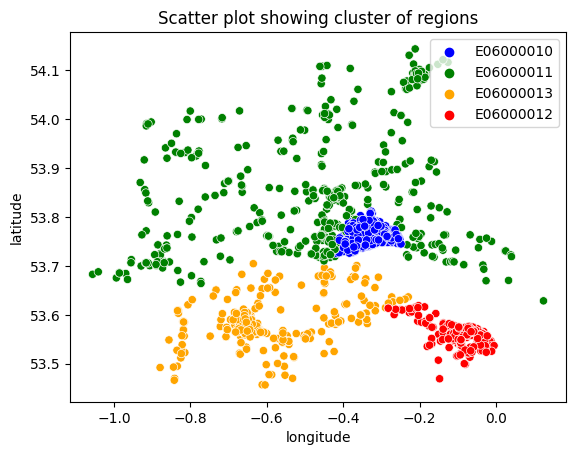

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming acc_2020_hum is your DataFrame with columns: longitude, latitude, local_authority_ons_district

# Define a color palette for the specified regions
colors = {"E06000010": "blue",
          "E06000011": "green",
          "E06000013": "orange",
          "E06000012": "red"}

# Create a Seaborn scatter plot
sns.scatterplot(x="longitude", y="latitude", hue="local_authority_ons_district",hue_order=["E06000010", "E06000011", "E06000013", "E06000012"], palette=colors, data=acc_2020_hum)

# Set legend labels
plt.legend(loc=0)

# Set plot title
plt.title("Scatter plot showing cluster of regions")

# Show the plot
plt.show()

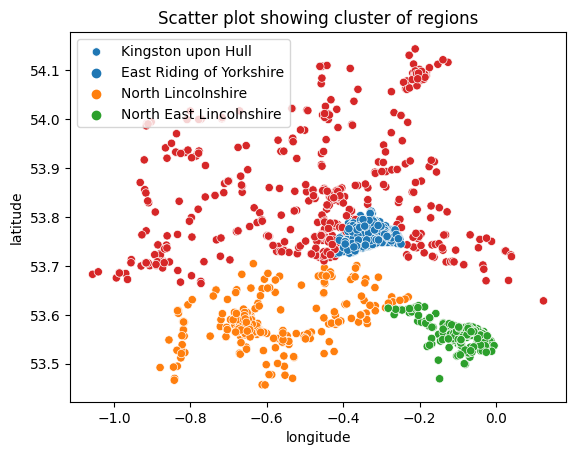

In [94]:
sns.scatterplot(x=acc_2020_hum["longitude"],y=acc_2020_hum["latitude"],hue=acc_2020_hum["local_authority_ons_district"])
plt.legend(["Kingston upon Hull","East Riding of Yorkshire","North Lincolnshire","North East Lincolnshire"],loc=0)
plt.title("Scatter plot showing cluster of regions")
plt.show()

* Considering possible features other than longitude and latitude

In [95]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

selected_features = [
     'number_of_vehicles', 'number_of_casualties', 'road_type', 'speed_limit',
    'junction_detail', 'light_conditions', 'weather_conditions',
    'road_surface_conditions', 'urban_or_rural_area'
]

df_selected = acc_2020_hum[selected_features]

df_selected.head()

,number_of_vehicles,number_of_casualties,road_type,speed_limit,junction_detail,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area
37750,1,1,6,30,3,4,1,1,1
37751,2,1,6,30,6,1,1,1,1
37752,1,1,6,30,5,4,1,1,2
37753,1,1,6,30,0,4,1,1,1
37754,1,1,3,50,0,4,1,1,1


In [96]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_selected)

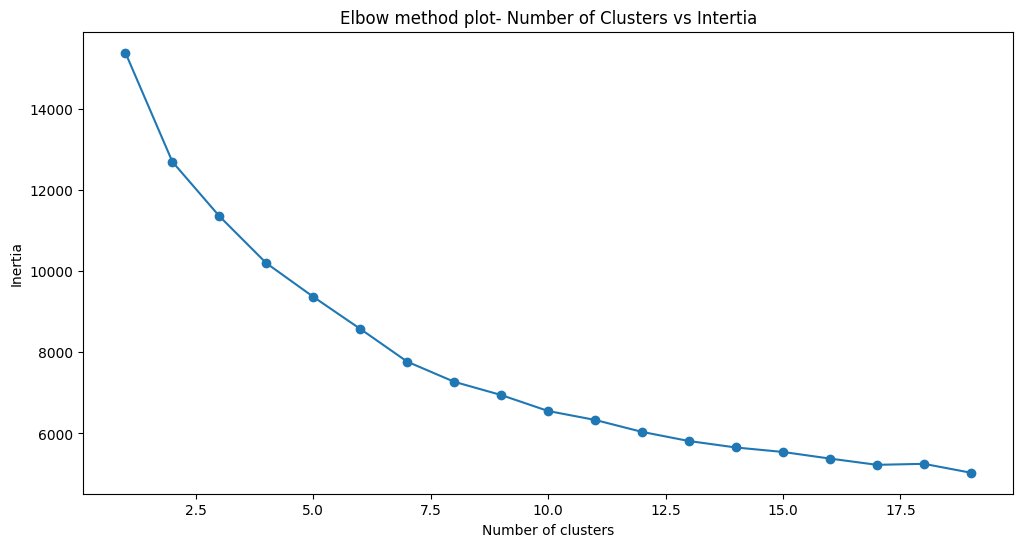

In [97]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_standardized)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Elbow method plot- Number of Clusters vs Intertia")
plt.show()

In [98]:
num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df_selected['cluster'] = kmeans.fit_predict(df_standardized)
cluster_analysis = df_selected.groupby('cluster').count()


cluster_dataframe = acc_2020_hum.copy()
cluster_dataframe['cluster'] = df_selected['cluster']

for cluster_id in range(num_clusters):
    cluster_data = cluster_dataframe[cluster_dataframe['cluster'] == cluster_id]
    cluster_center = kmeans.cluster_centers_[cluster_id]
    print(f"Cluster {cluster_id}:\nNumber of Accidents: {len(cluster_data)}")
    print(f"Cluster Center: {cluster_center}")
    print("=" * 30)


Cluster 0:
Number of Accidents: 574
Cluster Center: [-0.11553609  0.25047169 -0.03904512  1.01974915 -0.3359186   0.13155096
 -0.00417087  0.1053403   1.36034643]
Cluster 1:
Number of Accidents: 1135
Cluster Center: [ 0.05842971 -0.12667027  0.01974617 -0.51571455  0.16988306 -0.06652886
  0.00210932 -0.05327342 -0.68796374]


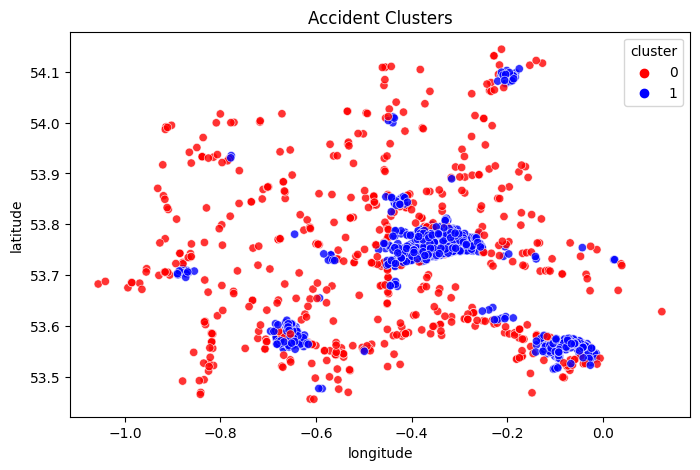

In [99]:
# Considering possible features other than longitude and latitude and clustering the accident data
df_selected['longitude']=acc_2020_hum["longitude"]
df_selected['latitude']=acc_2020_hum["latitude"]
plt.figure(figsize=(8, 5))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=df_selected,palette=["red","blue"], legend='full', alpha=0.8)
plt.title('Accident Clusters')
plt.show()

In [100]:
cluster_analysis

,number_of_vehicles,number_of_casualties,road_type,speed_limit,junction_detail,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area
cluster,,,,,,,,,
0,574,574,574,574,574,574,574,574,574
1,1135,1135,1135,1135,1135,1135,1135,1135,1135


* If only longitude and latitude are considered for clustering

In [101]:
X=acc_2020_hum[["longitude","latitude"]]

In [102]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized

array([[ 0.23193601,  0.21112255],
       [-0.05205355,  0.19039503],
       [-0.66813292, -1.5181789 ],
       ...,
       [ 0.33285777,  0.46882864],
       [-1.46231299, -1.09916628],
       [ 0.18178245,  0.17326077]])

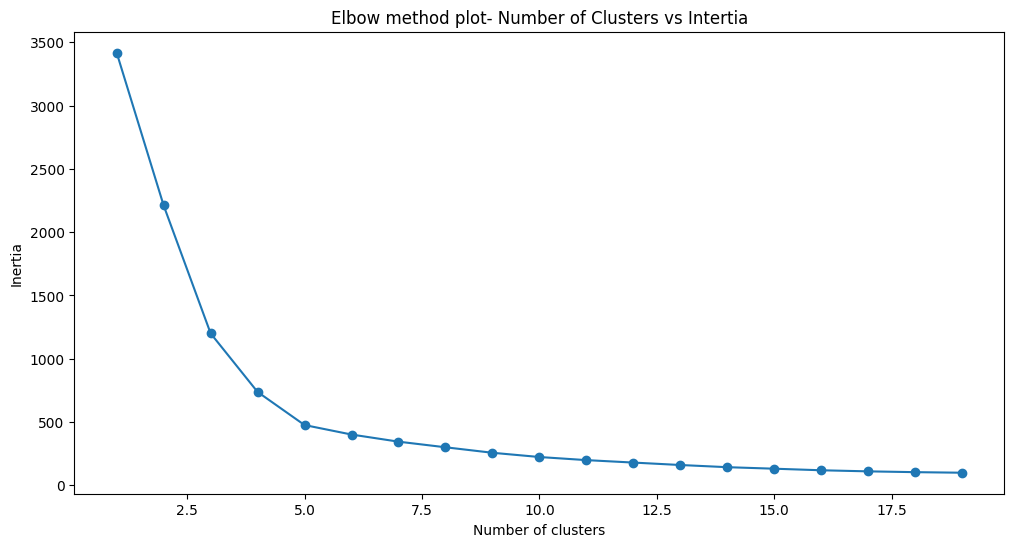

In [103]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(X_normalized)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Elbow method plot- Number of Clusters vs Intertia")
plt.show()

In [104]:
num_clusters = 4 
kmeans = KMeans(n_clusters=num_clusters, n_init = 10, random_state=0)
cluster_labels = kmeans.fit_predict(X_normalized)

In [105]:
cluster_dataframe = acc_2020_hum.copy()
cluster_dataframe['cluster'] = cluster_labels

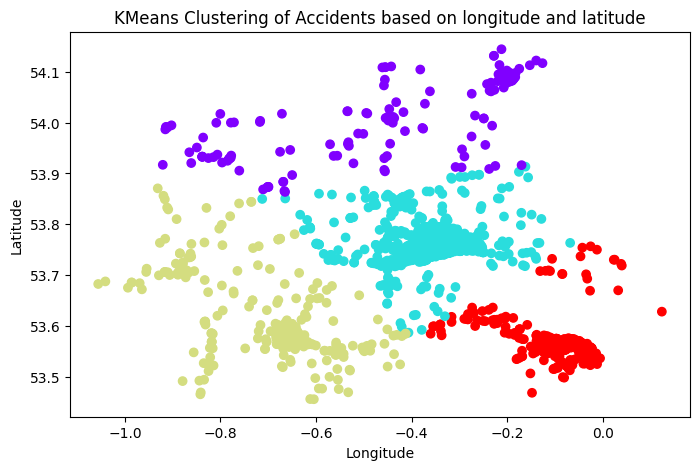

In [106]:
#when clustered only based on longitude and latitude
plt.figure(figsize=(8, 5))
plt.scatter(cluster_dataframe['longitude'], cluster_dataframe['latitude'], c=cluster_dataframe['cluster'], cmap='rainbow')
plt.title('KMeans Clustering of Accidents based on longitude and latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

> # Q6. Outlier Detection

In [107]:
acc_2020.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'hour'],
      dtype='object')

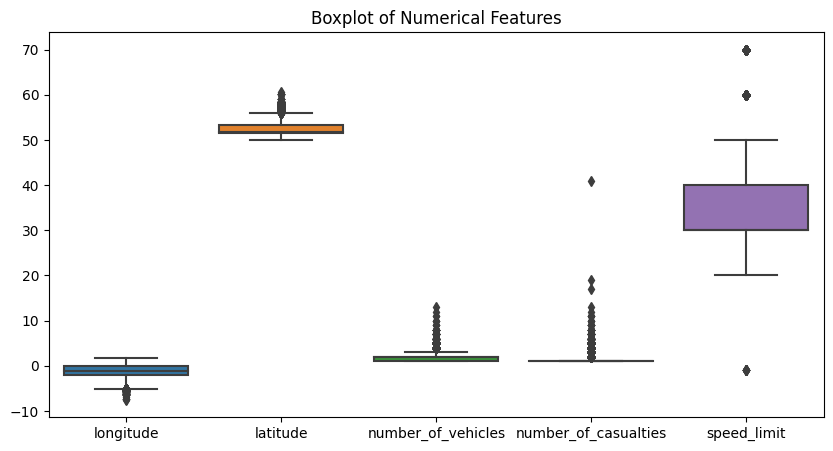

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['longitude', 'latitude','number_of_vehicles', 'number_of_casualties', 'speed_limit']

plt.figure(figsize=(10, 5))
sns.boxplot(data=acc_2020[numerical_cols])
plt.title('Boxplot of Numerical Features')
plt.show()

In [109]:
# Define a function to detect outliers using the IQR method
d_col_out={}
def detect_outliers(df, columns):
    outliers = pd.DataFrame()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, column_outliers], axis=0)
        d_col_out[column]=len(column_outliers)
    return outliers

outliers_df = detect_outliers(acc_2020, numerical_cols)
outliers_df.drop_duplicates()
outliers_df.shape

(36656, 37)

In [110]:
outliers_df.head(10)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,hour
77020,2020500920897,2020,500920897,163544.0,40644.0,-5.316043,50.218424,50,2,3,...,6,1,1,0,0,1,1,1,E01018876,19
77028,2020500921838,2020,500921838,167474.0,42518.0,-5.262196,50.236808,50,3,2,...,1,1,1,0,0,1,1,2,E01018896,11
77042,2020500922383,2020,500922383,178556.0,47763.0,-5.110104,50.288165,50,3,2,...,1,1,2,7,0,2,1,2,E01018821,10
77043,2020500922389,2020,500922389,179883.0,32316.0,-5.082543,50.149939,50,3,1,...,1,1,1,0,0,1,1,2,E01018806,10
77046,2020500922434,2020,500922434,168221.0,36134.0,-5.247842,50.179779,50,2,2,...,6,5,2,0,0,2,1,2,E01018922,7
77048,2020500922471,2020,500922471,178438.0,32384.0,-5.102779,50.150011,50,3,1,...,4,5,2,0,0,1,1,2,E01018900,18
77052,2020500922566,2020,500922566,145154.0,29353.0,-5.565770,50.109438,50,2,1,...,6,1,2,0,0,2,1,2,E01019003,19
77055,2020500922616,2020,500922616,151766.0,40314.0,-5.480618,50.210637,50,2,4,...,4,1,1,0,0,2,1,2,E01019012,22
77058,2020500922843,2020,500922843,148477.0,31306.0,-5.520673,50.128386,50,2,2,...,4,2,2,0,0,1,1,2,E01018996,18
77061,2020500923060,2020,500923060,172568.0,44127.0,-5.191845,50.253238,50,3,2,...,1,5,2,0,0,1,1,2,E01018918,7


In [111]:
d_col_out

{'longitude': 463,
 'latitude': 1212,
 'number_of_vehicles': 1836,
 'number_of_casualties': 17038,
 'speed_limit': 16107}

In [112]:
#There are 36656 outliers when we consider IQR method among 91k instances, 
#and the outliers are from speed_limit which cant be removed as it has major impact on accidents
#and the casualties can be out of IQR range as few accidents involving mutiple vehiclas or major accidents like bus can have more casualties
#other features are not considered as they are codes representing specific condition but not the inetensity of the situation

In [113]:
# # To remove all outlier data
# df_no_outliers = acc_2020[~acc_2020.index.isin(outliers_df.index)]

# # Visualize the distribution after removing outliers
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df_no_outliers[numerical_cols])
# plt.title('Boxplot of Numerical Features (Outliers Removed)')
# plt.show()


# Q7. Classification model

In [114]:
# SQL query to get 2020 data
conn = sqlite3.connect('/Users/raam/Downloads/Big Data/accident_data_v1.0.0_2023.db')


query = """
SELECT *
FROM accident a
JOIN vehicle v ON a.accident_index = v.accident_index
JOIN casualty c ON a.accident_index = c.accident_index
WHERE a.accident_year = 2020;
"""

acc_2020 = pd.read_sql_query(query, conn)

conn.close()

acc_2020.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,6,3,9,5,0,0,0,0,1,4
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1,3,1,1,0,0,0,0,1,2
2,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1,3,1,1,0,0,0,0,1,2
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,5,3,5,9,0,0,0,0,1,3
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,8,2,4,1,0,0,0,0,1,3


In [115]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(acc_2020[['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude' ]])
imputed_data = imputer.transform(acc_2020[['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude' ]].values)
acc_2020[['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude' ]] = pd.DataFrame(imputed_data)
acc_2020[['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude' ]]

,location_easting_osgr,location_northing_osgr,longitude,latitude
0,521389.0,175144.0,-0.254001,51.462262
1,529337.0,176237.0,-0.139253,51.470327
2,529337.0,176237.0,-0.139253,51.470327
3,526432.0,182761.0,-0.178719,51.529614
4,538676.0,184371.0,-0.001683,51.541210
...,...,...,...,...
220430,383664.0,810646.0,-2.271903,57.186317
220431,383664.0,810646.0,-2.271903,57.186317
220432,277161.0,674852.0,-3.968753,55.950940
220433,277161.0,674852.0,-3.968753,55.950940


In [116]:
acc_2020=acc_2020.drop_duplicates()
acc_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220435 entries, 0 to 220434
Data columns (total 76 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               220435 non-null  object 
 1   accident_year                                220435 non-null  int64  
 2   accident_reference                           220435 non-null  object 
 3   location_easting_osgr                        220435 non-null  float64
 4   location_northing_osgr                       220435 non-null  float64
 5   longitude                                    220435 non-null  float64
 6   latitude                                     220435 non-null  float64
 7   police_force                                 220435 non-null  int64  
 8   accident_severity                            220435 non-null  int64  
 9   number_of_vehicles                           220435 non-nul

In [117]:
numeric_columns = acc_2020.select_dtypes(include=['int64', 'float64']).columns
acc_corr=acc_2020[numeric_columns]
acc_corr.drop(["accident_severity"],axis=1)
acc_corr["accident_severity"]=acc_2020["accident_severity"]

In [118]:
numeric_columns

Index(['accident_year', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'day_of_week',
       'local_authority_district', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'vehicle_index', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_over

In [119]:
acc_corr=acc_corr.drop_duplicates()
acc_corr.shape

(220435, 68)

In [120]:
# acc_corr = acc_corr.T.drop_duplicates().T

#Removing duplicate columns
acc_corr = acc_corr.loc[:, ~acc_corr.columns.duplicated()]

In [121]:
acc_corr.shape

(220435, 68)

In [122]:
acc_corr["accident_index"]=acc_2020.iloc[:,0]

In [123]:
acc_corr = acc_corr.drop_duplicates(subset='accident_index')
acc_corr.shape

(91199, 69)

In [124]:
#To remove instances with NaN values
acc_corr = acc_corr.dropna()
acc_corr.shape

(91199, 69)

In [125]:
print(acc_corr.dtypes)

accident_year                           int64
location_easting_osgr                 float64
location_northing_osgr                float64
longitude                             float64
latitude                              float64
                                       ...   
pedestrian_road_maintenance_worker      int64
casualty_type                           int64
casualty_home_area_type                 int64
casualty_imd_decile                     int64
accident_index                         object
Length: 69, dtype: object


In [126]:
acc_corr=acc_corr.drop(["accident_index","accident_year"],axis=1)

In [ ]:
# Calculate correlation matrix
scaler = StandardScaler()
acc_corr_nor=scaler.fit_transform(acc_corr)
acc_corr_nor_df = pd.DataFrame(acc_corr_nor, columns=acc_corr.columns)
correlation_matrix = acc_corr_nor_df.corr()

# Create a heatmap
plt.figure(figsize=(45, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [128]:
X = acc_corr.drop(['accident_severity'], axis = 1)
y = acc_corr['accident_severity']

In [129]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_lr_pca = X.copy()
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_lr_pca)

n_components = 40
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_standardized)

columns_pca = [f'PC{i}' for i in range(1, n_components + 1)]
df_pca = pd.DataFrame(data=X_pca, columns=columns_pca)

In [130]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=123)

# Handling class imbalance using oversampling and undersampling
over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [131]:
# Decision Tree with class imbalance handling
lr_model = LogisticRegression()
lr_pipeline = Pipeline([
    ('over_sampler', over_sampler),
    ('under_sampler', under_sampler),
    ('lr_model', lr_model)
])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_pipeline.fit(X_train_scaled, y_train)
lr_predictions = lr_pipeline.predict(X_test_scaled)
print("Logisticr= regression Classification Report:")
print(classification_report(y_test, lr_predictions))
print("Accuracy:", accuracy_score(y_test, lr_predictions))
cm_lr_pca=confusion_matrix(y_test, lr_predictions)

Logisticr= regression Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.92      0.68       288
           2       0.89      0.89      0.89      3680
           3       0.99      0.97      0.98     14272

    accuracy                           0.95     18240
   macro avg       0.81      0.93      0.85     18240
weighted avg       0.96      0.95      0.96     18240

Accuracy: 0.9541118421052631


In [132]:
cm_lr_pca

array([[  265,    14,     9],
       [  210,  3269,   201],
       [   13,   390, 13869]])

Text(0.5, 1.0, 'Logistic regression with PCA Confusion Matrix')

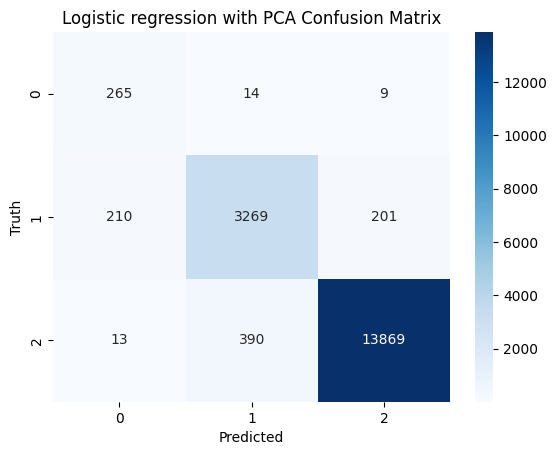

In [133]:
sns.heatmap(cm_lr_pca, annot=True, fmt='d',cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Logistic regression with PCA Confusion Matrix")

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [135]:
# Decision Tree with class imbalance handling
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_pipeline = Pipeline([
    ('over_sampler', over_sampler),
    ('under_sampler', under_sampler),
    ('dt_model', dt_model)
])

dt_pipeline.fit(X_train, y_train)
dt_predictions = dt_pipeline.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))
cm_dt=confusion_matrix(y_test, dt_predictions)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.88      0.87       288
           2       0.92      0.92      0.92      3680
           3       0.98      0.98      0.98     14272

    accuracy                           0.97     18240
   macro avg       0.92      0.93      0.92     18240
weighted avg       0.97      0.97      0.97     18240

Accuracy: 0.9662828947368421


In [136]:
cm_dt

array([[  254,    23,    11],
       [   24,  3389,   267],
       [   17,   273, 13982]])

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

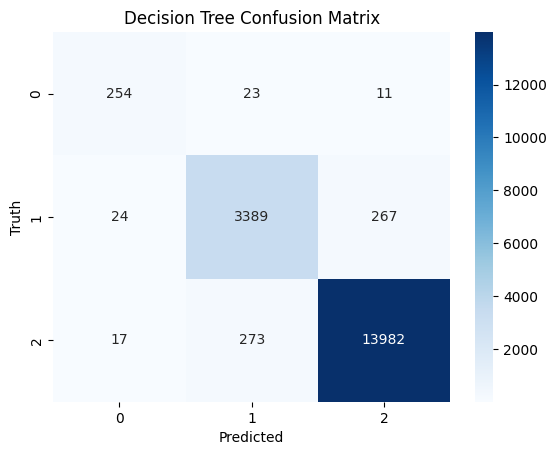

In [137]:
sns.heatmap(cm_dt, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Decision Tree Confusion Matrix")

In [138]:
# Random Forest with class imbalance handling
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_pipeline = Pipeline([
    ('over_sampler', over_sampler),
    ('under_sampler', under_sampler),
    ('rf_model', rf_model)
])

rf_pipeline.fit(X_train, y_train)
rf_predictions = rf_pipeline.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))
cm_rf=confusion_matrix(y_test, rf_predictions)


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.88      0.93       288
           2       0.99      0.92      0.95      3680
           3       0.98      1.00      0.99     14272

    accuracy                           0.98     18240
   macro avg       0.99      0.93      0.96     18240
weighted avg       0.98      0.98      0.98     18240

Accuracy: 0.981030701754386


In [139]:
cm_rf

array([[  252,    23,    13],
       [    0,  3371,   309],
       [    0,     1, 14271]])

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

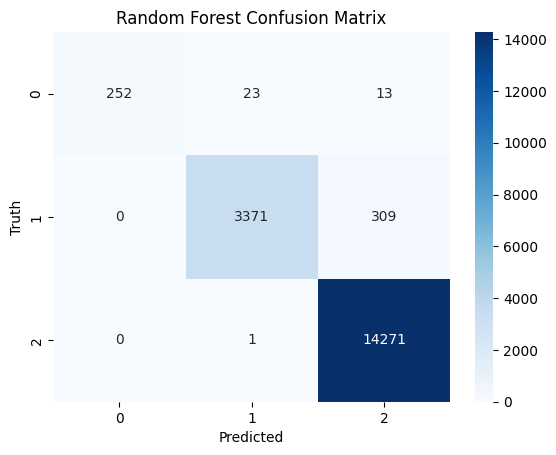

In [140]:
sns.heatmap(cm_rf, annot=True, fmt='d',cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Random Forest Confusion Matrix")

In [141]:
# Neural Network (Artificial Neural Network - ANN) with class imbalance handling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ann_model = MLPClassifier(random_state=42)
ann_model.fit(X_train_scaled, y_train)
ann_predictions = ann_model.predict(X_test_scaled)
print("\nArtificial Neural Network Classification Report:")
print(classification_report(y_test, ann_predictions))
print("Accuracy:", accuracy_score(y_test, ann_predictions))
cm_ann=confusion_matrix(y_test, ann_predictions)


Artificial Neural Network Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.88      0.88       288
           2       0.93      0.92      0.93      3680
           3       0.98      0.98      0.98     14272

    accuracy                           0.97     18240
   macro avg       0.93      0.93      0.93     18240
weighted avg       0.97      0.97      0.97     18240

Accuracy: 0.9696271929824561


In [142]:
cm_ann

array([[  252,    26,    10],
       [   29,  3395,   256],
       [    5,   228, 14039]])

Text(0.5, 1.0, 'ANN Confusion Matrix')

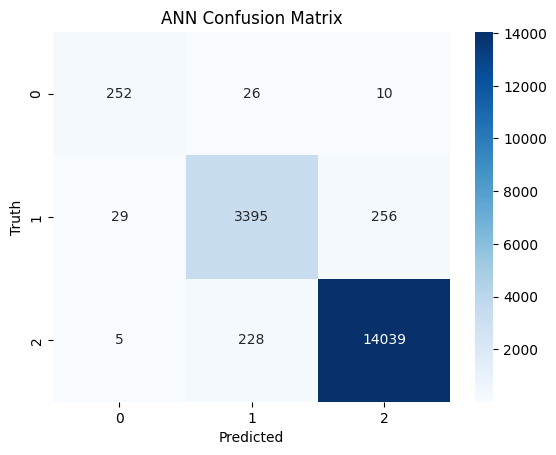

In [143]:
sns.heatmap(cm_ann, annot=True, fmt='d',cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("ANN Confusion Matrix")